<a href="https://colab.research.google.com/github/eliazulai29/tensor/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.13.0
Notebook last run (end-to-end): 2023-10-04 05:51:24.193466


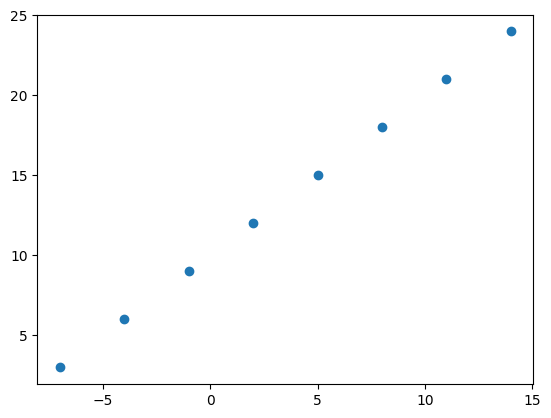

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);


In [24]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [25]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [26]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [27]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

In [28]:
X[1].ndim

0

In [29]:
X[1], y[1]

(<tf.Tensor: shape=(), dtype=float32, numpy=-4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [30]:
import numpy as np
import matplotlib.pyplot as plt


In [31]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 16,18,40])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 26,28,30])

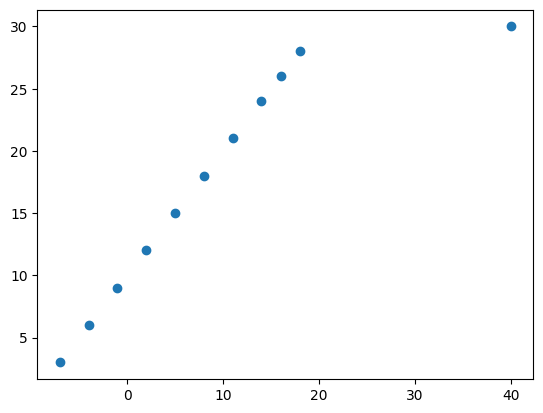

In [32]:
plt.scatter(X,y)

In [33]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [34]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

###  Setps in modelling with TensorFlow
1. Create a model - Define input output layers as well as hidden layers
2. compiling model - Define the loss funcation, the funcation wich tell our model how worng it is and the optimizer - tell our model how to improve the patterns its learning and evalution metrics.
3. Fitting our model - letting the model to find pattrens between X & y (features & labels)



In [35]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])


# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)



Epoch 1/5
1/1 [==============================] - 0s 344ms/step - loss: 27.8959 - mae: 27.8959
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 26.7771 - mae: 26.7771
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 25.6583 - mae: 25.6583
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 24.5396 - mae: 24.5396
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 23.4208 - mae: 23.4208


In [36]:
# Check out X and y
X, y

(<tf.Tensor: shape=(11,), dtype=float32, numpy=
 array([-7., -4., -1.,  2.,  5.,  8., 11., 14., 16., 18., 40.],
       dtype=float32)>,
 <tf.Tensor: shape=(11,), dtype=float32, numpy=
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 26., 28., 30.],
       dtype=float32)>)

In [37]:
# Make a prediction with the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 94ms/step


array([[-8.706897]], dtype=float32)

In [38]:
y_pred + 11

array([[2.2931032]], dtype=float32)

In [39]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=50) # train for 100 epochs not 10

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 17.8130 - mae: 17.8130
Epoch 2/50
1/1 [==============================] - 0s 11ms/step - loss: 17.1233 - mae: 17.1233
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 16.4509 - mae: 16.4509
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 15.7757 - mae: 15.7757
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 15.1032 - mae: 15.1032
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 14.4328 - mae: 14.4328
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 13.8254 - mae: 13.8254
Epoch 8/50
1/1 [==============================] - 0s 18ms/step - loss: 13.1852 - mae: 13.1852
Epoch 9/50
1/1 [==============================] - 0s 13ms/step - loss: 12.4595 - mae: 12.4595
Epoch 10/50
1/1 [==============================] - 0s 13ms/step - loss: 11.6353 - mae: 11.6353
Epoch 11/50
1/1 [==============================] - 0s 13ms/st

In [40]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 145ms/step


array([[27.34126]], dtype=float32)

In [41]:
# Make a bigger dataset
X = np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [42]:
X.shape

(50,)

In [43]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [44]:
y.shape

(50,)

In [45]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [46]:
# Check how many samples we have
len(X)

50

In [47]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

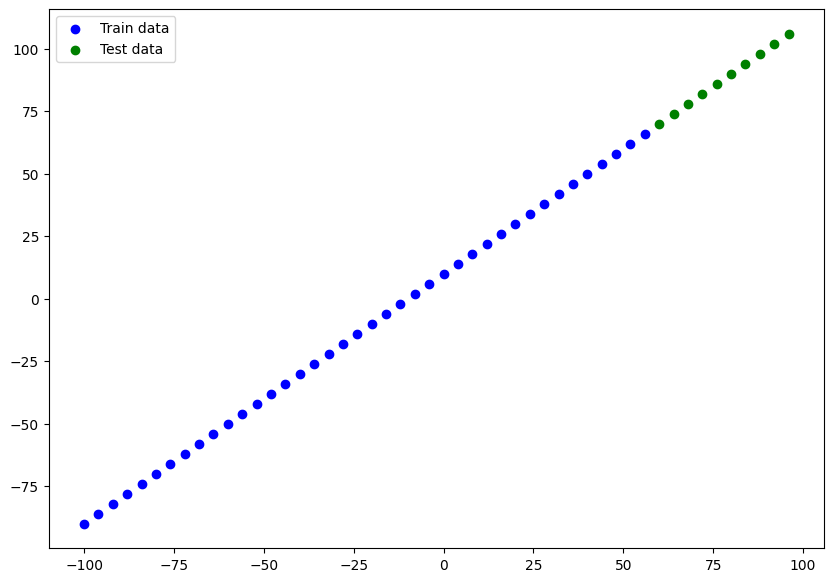

In [53]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label= 'Train data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label= 'Test data')
# Show the legend
plt.legend()



In [49]:
# Set random seed
tf.random.set_seed(42)
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])




In [54]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [55]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [60]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


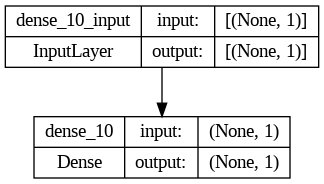

In [61]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [62]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 52ms/step


In [63]:
y_preds

array([[49.37421 ],
       [52.41553 ],
       [55.456852],
       [58.498177],
       [61.539497],
       [64.580826],
       [67.62215 ],
       [70.66347 ],
       [73.70479 ],
       [76.74611 ]], dtype=float32)

In [64]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

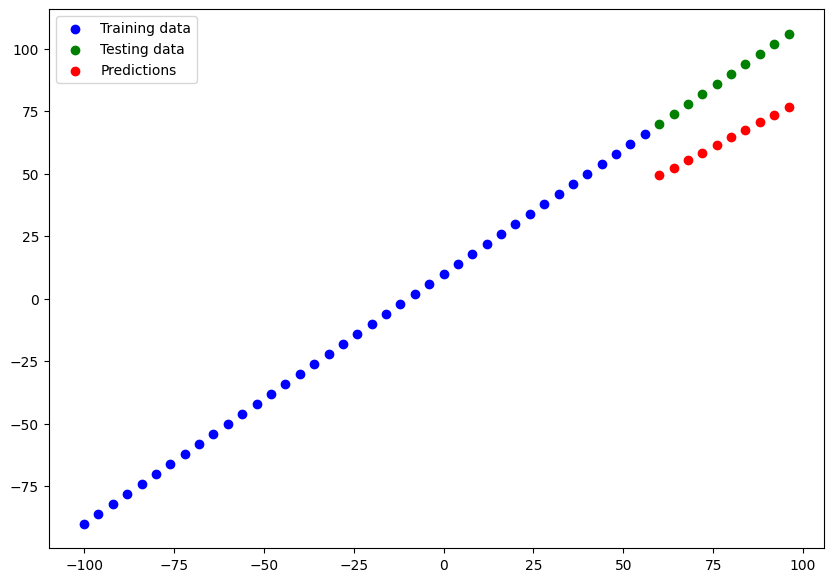

In [65]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [66]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 137ms/step - loss: 24.9398 - mae: 24.9398


[24.939838409423828, 24.939838409423828]

In [67]:
# Calculate the mean absolute error using TensorFlow
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([38.62579 , 35.58447 , 32.543148, 29.501825, 26.460505, 23.419174,
       20.377853, 17.469227, 15.036169, 13.152334], dtype=float32)>

In [68]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [69]:
y_preds

array([[49.37421 ],
       [52.41553 ],
       [55.456852],
       [58.498177],
       [61.539497],
       [64.580826],
       [67.62215 ],
       [70.66347 ],
       [73.70479 ],
       [76.74611 ]], dtype=float32)

In [70]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [71]:
y_preds.squeeze().shape

(10,)

In [72]:

y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([49.37421 , 52.41553 , 55.456852, 58.498177, 61.539497, 64.580826,
        67.62215 , 70.66347 , 73.70479 , 76.74611 ], dtype=float32))

In [73]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=24.939838>

In [74]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=629.5779>

In [75]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))


<tf.Tensor: shape=(), dtype=float64, numpy=24.939839553833007>

In [76]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)


### build 3 models and compare their results:

* model_1 - same as original model, 1 layer, trained for 100 epochs.
* model_2 - 2 layers, trained for 100 epochs.
* model_3 - 2 layers, trained for 500 epochs.

In [77]:
# Build model_1
tf.random.set_seed(42)
# Replicate original model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=tf.keras.metrics.mae)

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 28.2836 - mean_absolute_error: 28.2836
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 8.8398 - mean_absolute_error: 8.8398
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 9.7029 - mean_absolute_error: 9.7029
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8451 - mean_absolute_error: 11.8451
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9116 - mean_absolute_error: 10.9116
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 10.0852 - mean_absolute_error: 10.0852
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1182 - mean_absolute_error: 9.1182
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.1021 - mean_absolute_error: 9.1021
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 15.0824 - mean_absolute_error: 15.0824
Epoch 10/100
2/2

In [78]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 106ms/step


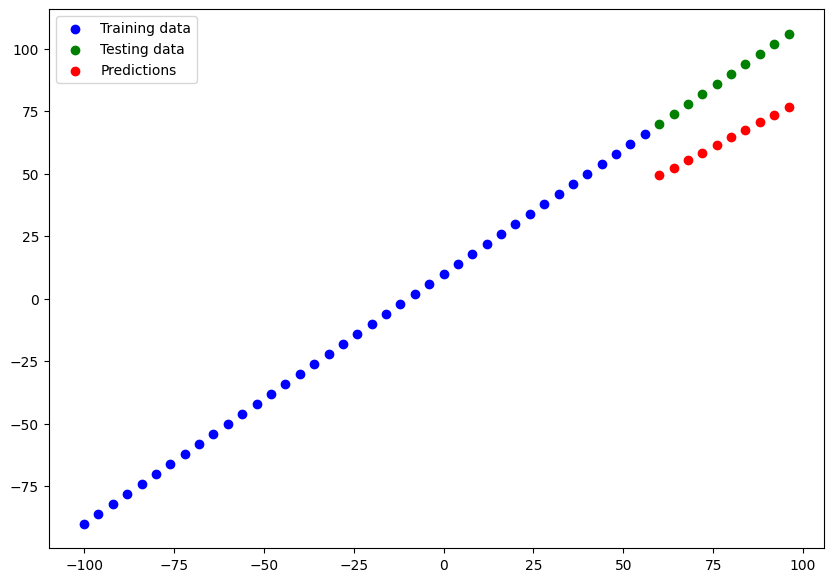

In [79]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds)


In [80]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(30.669125, 951.06866)

In [81]:
### Build model_2
# Set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 2s 20ms/step - loss: 45.9240 - mae: 45.9240
Epoch 2/100
2/2 [==============================] - 0s 24ms/step - loss: 37.2846 - mae: 37.2846
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 22.8585 - mae: 22.8585
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 20.6412 - mae: 20.6412
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 12.3659 - mae: 12.3659
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 10.0468 - mae: 10.0468
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: 10.9189 - mae: 10.9189
Epoch 8/100
2/2 [==============================] - 0s 30ms/step - loss: 10.9658 - mae: 10.9658
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 38.7870 - mae: 38.7870
Epoch 10/100
2/2 [==============================] - 0s 25ms/step - loss: 26.3888 - mae: 26.3888
Epoch 11/100
2/2 [==============================]

1/1 [==============================] - 0s 54ms/step


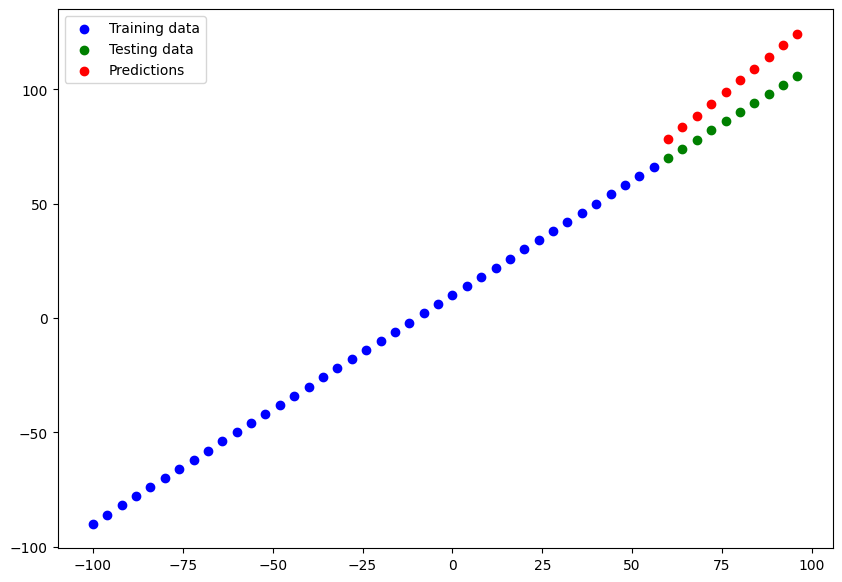

In [82]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [83]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(13.306122, 187.13864)

### **Saving a model**
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

The **SavedModel format** (default).
The **HDF5 format**.

In [84]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [85]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [86]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


In [88]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 58ms/step


True

In [90]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **A larger example**

In [91]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [92]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [93]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [94]:
len(insurance.columns)

7

In [95]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [96]:
len(insurance_one_hot.columns)

12

In [129]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot['charges']

In [98]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [99]:
len(X)

1338

In [100]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [5]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits


In [134]:
# Set random seed
tf.random.set_seed(42)

# Create a new model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.optimizers.SGD(),
                        metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8601.5342 - mae: 8601.5342
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7860.4419 - mae: 7860.4419
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7606.9316 - mae: 7606.9316
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7666.2695 - mae: 7666.2695
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7715.7261 - mae: 7715.7261
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7644.7290 - mae: 7644.7290
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7553.7290 - mae: 7553.7290
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7683.5576 - mae: 7683.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7437.1611 - mae: 7437.1611
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7674.4355 - mae: 7674.4355

In [132]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7291.4937 - mae: 7291.4937


[7291.49365234375, 7291.49365234375]

### We'll try 3 things:

* Increasing the number of layers (2 -> 3).
* Increasing the number of units in each layer (except for the output layer).
* Changing the optimizer (from SGD to Adam).



In [136]:
# Set random seed
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=0, callbacks=[callback])

In [105]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# # This callback will stop the training when there is no improvement in
# # the loss for three consecutive epochs.
# model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
# model.compile(tf.keras.optimizers.SGD(), loss='mse')
# history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
#                     epochs=10, batch_size=1, callbacks=[callback],
#                     verbose=0)
# len(history.history['loss'])  # Only 4 epochs are run.


In [137]:
# Check the results of the insurance model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3628.6841 - mae: 3628.6841


[3628.68408203125, 3628.68408203125]

In [107]:
len(X_train.columns)

11

In [108]:
insurance_model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               1200      
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


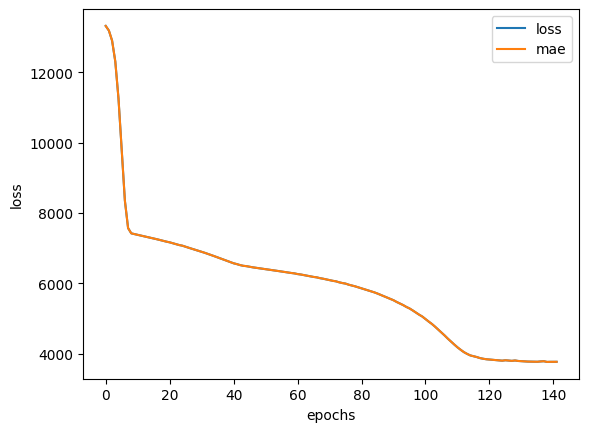

In [109]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [110]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3629.6934 - mae: 3629.6934


(3629.693359375, 3629.693359375)

In [ ]:
X

<Axes: ylabel='Frequency'>

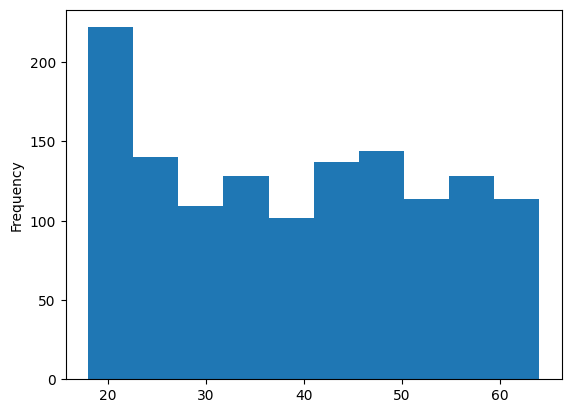

In [140]:
X['age'].plot(kind="hist")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")



In [6]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits


### make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:
* MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
* OneHotEncoder - one hot encode the non-numerical columns.

In [7]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance['charges']

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal

In [115]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [116]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [117]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [118]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [119]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 3169.1985 - mae: 3169.1985


In [120]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3629.693359375, 3169.198486328125)